<a href="https://colab.research.google.com/github/larrymoreorless/Data-Viz/blob/master/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# activate R magic
%load_ext rpy2.ipython                                                                             

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


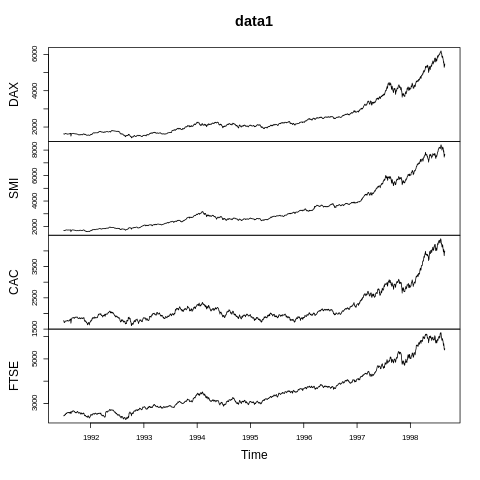

In [0]:
%%R
library(ggplot2)
library(dplyr)
library(reshape2)
library(RColorBrewer)

#import european stock market data
data1 <- EuStockMarkets
head(data1)

#Generate Paneled plot of the four indices
plot(data1)

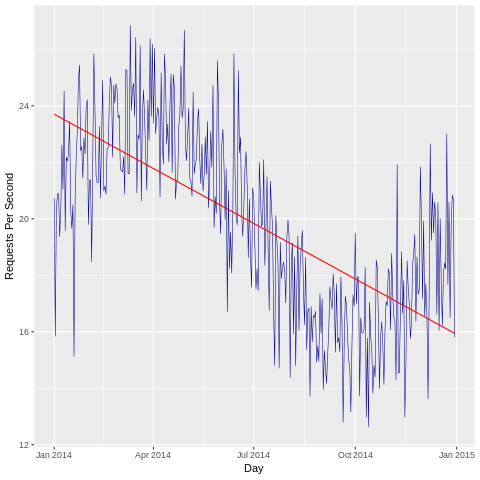

In [0]:
%%R
#import time series data
data2 <- read.csv(url("http://cs.ucf.edu/~wiegand/ids6938/datasets/RequestData.csv"))
head(data2)

#Convert date-time to format compatible with ggplot
data2$Day <- strptime(data2$Day,"%m-%d-%Y")
data2$Day <- as.POSIXct(data2$Day)

#Generate line plot with smooth fit to time series
ggplot(data2, aes(x=Day, y = RequestsPerSecond)) +
  geom_line(size=0.25,color="darkblue") +
  geom_smooth(method=lm, se=FALSE, color="red", size=.5) +
  ylab("Requests Per Second")